In [ ]:
import os
import pickle
from tqdm.notebook import tqdm
import nltk
import re
import json
from collections import Counter

In [ ]:
# load frequent k-mers alongside their probabilities of appearance
input_dir = './data'
with open(os.path.join(input_dir, 'frequent_kmers.json'), 'r') as fp:
    dictionary = json.load(fp)
for k, v in dictionary.items():
    print(k, v)
    break

In [ ]:
def word_prob(word): 
    if word in dictionary:
        return dictionary[word] / total
    else:
        return 0
    
def words(text): 
    return re.findall('[A-Z]+', text) 

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))
print(max_word_length)

In [ ]:
output_dir = './data'
with open(os.path.join(output_dir, 'acc2protfam.pkl'), 'rb') as pkl:
    acc2protfam = pickle.load(pkl)

In [ ]:
list(acc2protfam.keys())[:10]

In [12]:
tokenized_data = {}
sequence = ''
ctr512 = 0
ctr1024 = 0

flag = False
for line in tqdm(open(os.path.join(input_dir, 'uniprot_sprot.dat'))):
    if line.startswith('AC'):
        acc_id = line[2:].strip(' ')[:-2]
    if flag:
        if line.startswith('/'):
            flag = False
            tokenized_data[acc_id] = viterbi_segment(sequence)[0]
            if len(tokenized_data[acc_id]) > 512:
                ctr512 += 1
            elif len(tokenized_data[acc_id]) > 1024:
                ctr1024 += 1
                print(acc_id, end=', ')
            sequence = ''
            continue
        sequence = sequence + ''.join(line[:-1].split(' '))
    if line.startswith('SQ'):
        flag = True

In [16]:
for k, v in tokenized_data.items():
    print(k, v)
    break
# type(tokenized_data)
len(list(tokenized_data.keys()))

Q6GZX4 ['MAFS', 'AEDV', 'LKE', 'YD', 'RRRR', 'MEAL', 'LLSL', 'YY', 'PND', 'RKLLD', 'YKE', 'WSP', 'PRVQ', 'VE', 'CPKA', 'PV', 'EW', 'NN', 'PPS', 'EK', 'GL', 'IVGH', 'FSGI', 'KY', 'KGEK', 'AQA', 'SE', 'VD', 'VNKM', 'CCW', 'VS', 'KFKD', 'AMR', 'RYQG', 'IQ', 'TC', 'KI', 'PG', 'KVLS', 'DLDA', 'KIKA', 'YNLT', 'VEGV', 'EGFV', 'RYSR', 'VT', 'KQH', 'VAA', 'FLKE', 'LRHS', 'KQ', 'YENV', 'NLI', 'HY', 'ILTD', 'KRVD', 'IQH', 'LEKDL', 'VKDF', 'KALVE', 'SAHR', 'MRQ', 'GHMI', 'NV', 'KYIL', 'YQ', 'LLKK', 'HGH', 'GPDG', 'PDI', 'LT', 'VK', 'T', 'G', 'S', 'K', 'G', 'V', 'L', 'Y', 'D', 'D', 'S', 'F', 'R', 'K', 'I', 'Y', 'T', 'D', 'L', 'G', 'W', 'K', 'F', 'T', 'P', 'L']


563005

In [41]:
output_dir = './data'
with open(os.path.join(output_dir, 'tokenized_fasta.pkl'), 'wb') as pkl:
    pickle.dump(tokenized_data, pkl)

EOFError: Ran out of input

In [26]:
tagged_tokenized_data = []
for k, v in tqdm(tokenized_data.items()):
    if k in acc2protfam.keys():
        tagged_tokenized_data.append({
            'acc_id': k,
            'seq': v,
            'fam': acc2protfam[k],
        })
with open(os.path.join(output_dir, 'tagged_tokenized_data.pkl'), 'wb') as pkl:
    pickle.dump(tagged_tokenized_data, pkl)

In [27]:
tagged_tokenized_data[0]

{'acc_id': 'Q91G88',
 'seq': ['MDS',
  'LNEV',
  'CY',
  'EQIK',
  'GT',
  'FYK',
  'GLFG',
  'DF',
  'PL',
  'IVD',
  'KK',
  'TGCF',
  'NA',
  'TK',
  'LC',
  'VLGG',
  'KRF',
  'VDW',
  'NKTL',
  'RS',
  'KKLI',
  'QYY',
  'ET',
  'RC',
  'DIK',
  'TE',
  'SLLY',
  'EIK',
  'GD',
  'NN',
  'DEIT',
  'KQI',
  'TGTY',
  'LPKE',
  'FI',
  'LDIA',
  'SWIS',
  'VE',
  'FYDK',
  'CN',
  'NII',
  'INYF',
  'VNEY',
  'KT',
  'MDKK',
  'TLQS',
  'KINE',
  'VE',
  'EKMQ',
  'KLLN',
  'EKEEE',
  'LQE',
  'KNDK',
  'IDEL',
  'ILFS',
  'KR',
  'MEE',
  'DR',
  'KK',
  'DREM',
  'MIKQ',
  'EKM',
  'LRE',
  'LGIHL',
  'ED',
  'VSSQ',
  'NN',
  'ELIEK',
  'VDE',
  'QVEQ',
  'NAVL',
  'NFK',
  'ID',
  'NI',
  'Q',
  'N',
  'K',
  'L',
  'E',
  'I',
  'A',
  'V',
  'E',
  'D',
  'R',
  'A',
  'P',
  'Q',
  'P',
  'K',
  'Q',
  'N',
  'L',
  'K',
  'R',
  'E',
  'R',
  'F',
  'I',
  'L',
  'L',
  'K',
  'R',
  'N',
  'D',
  'D',
  'Y',
  'Y',
  'P',
  'Y',
  'Y',
  'T',
  'I',
  'R',
  'A',
  'Q',
  '

In [30]:
query_data_train = []
labels = []
for entry in tqdm(tagged_tokenized_data):
    query_data_train.append(' '.join(entry['seq']))
    labels.append(entry['fam'])
with open(os.path.join(output_dir, 'query_data_train.pkl'), 'wb') as pkl:
    pickle.dump(query_data_train, pkl)
with open(os.path.join(output_dir, 'labels.pkl'), 'wb') as pkl:
    pickle.dump(labels, pkl)

In [ ]:
query_data_train[0], labels[0]

In [1]:
import pickle
import os
output_dir = './data'
with open(os.path.join(output_dir, 'query_data_train.pkl'), 'rb') as pkl:
    query_data_train = pickle.load(pkl)
lens = [len(i.split(' ')) for i in query_data_train]
lens[:10]

[195, 691, 178, 200, 88, 207, 205, 38, 39, 38]

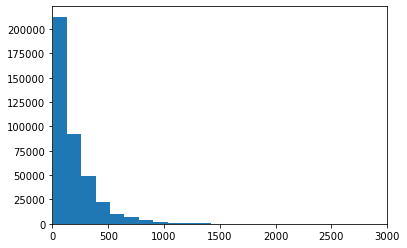

In [2]:
import matplotlib.pyplot as plt
plt.hist(lens, bins=100)
plt.xlim(0, 3000)
plt.show()

In [3]:
ctr512 = 0
for i in query_data_train:
    if len(i.split(' '))>512:
        ctr512 += 1
ctr512, 100*ctr512/len(query_data_train)

(27448, 6.802562609202097)

In [4]:
with open(os.path.join(output_dir, 'labels.pkl'), 'rb') as pkl:
    labels = pickle.load(pkl)
fams = dict(zip(list(set(labels)), [0 for i in range(len(list(set(labels))))]))
for i in labels:
    fams[i] += 1
list(fams.keys())[:10]

['',
 'spermadhesin family',
 'RNR ribonuclease family',
 'RNA polymerase subunit omega family',
 'HMG-CoA lyase family',
 'hunchback C2H2-type zinc-finger protein family',
 'LptD family',
 'comF family',
 'TO family',
 'PCP4 family']

In [14]:
ctr = 0
top_fams = []
for k, v in fams.items():
    if v > 700:
        top_fams.append(k)
        ctr += 1
len(top_fams)

103

In [15]:
query_data_train_top = []
labels_top = []

for i in range(len(labels)):
    if labels[i] in top_fams:
        labels_top.append(labels[i])
        query_data_train_top.append(query_data_train[i])
len(query_data_train_top), len(labels_top)

(112401, 112401)

In [16]:
with open(os.path.join(output_dir, 'query_data_train_top_700.pkl'), 'wb') as pkl:
    pickle.dump(query_data_train_top, pkl)
with open(os.path.join(output_dir, 'labels_top_700.pkl'), 'wb') as pkl:
    pickle.dump(labels_top, pkl)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(query_data_train_top, labels_top, random_state=42)
len(list(set(y_train))), len(list(set(y_test)))

(775, 775)

In [50]:
with open(os.path.join(output_dir, 'split_data/X_train.pkl'), 'wb') as pkl:
    pickle.dump(X_train, pkl)
with open(os.path.join(output_dir, 'split_data/X_test.pkl'), 'wb') as pkl:
    pickle.dump(X_test, pkl)
with open(os.path.join(output_dir, 'split_data/y_train.pkl'), 'wb') as pkl:
    pickle.dump(y_train, pkl)
with open(os.path.join(output_dir, 'split_data/y_test.pkl'), 'wb') as pkl:
    pickle.dump(y_test, pkl)

In [13]:
with open(os.path.join(output_dir, 'tagged_tokenized_data.pkl'), 'rb') as pkl:
    tagged_tokenized_data = pickle.load(pkl)
tagged_tokenized_data[0]

{'acc_id': 'Q91G88',
 'seq': ['MDS',
  'LNEV',
  'CY',
  'EQIK',
  'GT',
  'FYK',
  'GLFG',
  'DF',
  'PL',
  'IVD',
  'KK',
  'TGCF',
  'NA',
  'TK',
  'LC',
  'VLGG',
  'KRF',
  'VDW',
  'NKTL',
  'RS',
  'KKLI',
  'QYY',
  'ET',
  'RC',
  'DIK',
  'TE',
  'SLLY',
  'EIK',
  'GD',
  'NN',
  'DEIT',
  'KQI',
  'TGTY',
  'LPKE',
  'FI',
  'LDIA',
  'SWIS',
  'VE',
  'FYDK',
  'CN',
  'NII',
  'INYF',
  'VNEY',
  'KT',
  'MDKK',
  'TLQS',
  'KINE',
  'VE',
  'EKMQ',
  'KLLN',
  'EKEEE',
  'LQE',
  'KNDK',
  'IDEL',
  'ILFS',
  'KR',
  'MEE',
  'DR',
  'KK',
  'DREM',
  'MIKQ',
  'EKM',
  'LRE',
  'LGIHL',
  'ED',
  'VSSQ',
  'NN',
  'ELIEK',
  'VDE',
  'QVEQ',
  'NAVL',
  'NFK',
  'ID',
  'NI',
  'Q',
  'N',
  'K',
  'L',
  'E',
  'I',
  'A',
  'V',
  'E',
  'D',
  'R',
  'A',
  'P',
  'Q',
  'P',
  'K',
  'Q',
  'N',
  'L',
  'K',
  'R',
  'E',
  'R',
  'F',
  'I',
  'L',
  'L',
  'K',
  'R',
  'N',
  'D',
  'D',
  'Y',
  'Y',
  'P',
  'Y',
  'Y',
  'T',
  'I',
  'R',
  'A',
  'Q',
  '

In [14]:
labels_top = []
query_data_train_top = []
acc_ids_top = []
for entry in tagged_tokenized_data:
    if entry['fam'] in top_fams:
        labels_top.append(entry['fam'])
        query_data_train_top.append(' '.join(entry['seq']))
        acc_ids_top.append(entry['acc_id'])
acc_ids_top[0], labels_top[0], query_data_train_top[0]

('Q6GZV6',
 'protein kinase superfamil',
 'MATN YCD EFER NPTR NP RTGR TIKR GG PV FR ALERE CSDG AA RVFP AAAV RG AAAA RAA SPR VAAA SPCP EFAR DPT RNPR TGRP IKR GG PV FR ALERE CA DY GGAS PRRV SP ARA FPN RRV SP ARR QSPA EAAEA SPCP EFAR DPTR NP RTGR TIKR GG PTYR ALEAE CAD YG RLSP IR SPWS DW SSTG LS PF RSH MRKS PA RR SP ARR SP ARR SLAR YTEH LT SDSE TEVD Y D A R N V I R S Q V G P G G V C E R F A A D P T R N P V T G S P L S R N D P L Y T D L M E I C K G Y P D T P L T K S L T G E G T D D D T C E A F C R D P T R N P V T G Q K M R R N G I E Y Q M F A E E C D C S G I S R P S G V S R T S G T S G S S G S S A S S R P P N S F E A P G A S S R P P N S F E A S G A A R V P G T P S V S R G E P R W M S S I S T R H N Y D E S N P M S V A F R L R H V K D I R K F L R T V R P G R S G F C A T D K G G W L G S A A V S D N V I G Q G S W G S V H M V K F R D F P E E F V V K E A V L M S V S E K H R Y K P T V V W D E W A A G S V P D E V V V N N M V T E I A A T G M T P F V P L T A G A G A C D S C N P Q L L E K A A K V T K

In [15]:
with open(os.path.join(output_dir, 'query_data_train_top_100.pkl'), 'wb') as pkl:
    pickle.dump(query_data_train_top, pkl)
with open(os.path.join(output_dir, 'labels_top_100.pkl'), 'wb') as pkl:
    pickle.dump(labels_top, pkl)
with open(os.path.join(output_dir, 'acc_ids_top_100.pkl'), 'wb') as pkl:
    pickle.dump(acc_ids_top, pkl)